# Análisis exploratorio de datos (EDA) de Sistema de bicicletas compartidas - 2011

## Introducción

En este proyecto realizaremos un análisis exploratorio de datos con python, utilizando información de la biblioteca de datos UC Irvine Machine Learning Repository sobre el sistema de bicicletas compartidas del año 2011, que dispone de variables como la temperatura, fechas y tipo de clientes.

## Objetivos

Estudiar el comportamiento de los clientes en relación a  las estaciones del año. Se buscará a través del análisis estadístico un comportamiento anual de parte del cliente para lograr un trabajo más óptimo.

## Hipótesis

**Hipótesis 1**:
Existe una diferencia significativa en el uso promedio de bicicletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).

**Hipótesis 2**:
Existe una diferencia en el promedio de uso entre las estaciones cálidas.

**Hipótesis 3**:
Existe una diferencia en el promedio de uso entre las estaciones frías.

**Hipótesis 4**:
¿Cómo se manifiesta el comportamiento por tipo de clientes durante la temporada de mayor actividad?

**Hipótesis 5**:
¿Cómo se refleja el comportamiento por tipo de clientes durante la temporada de menor actividad?

**Hipótesis 6**:
¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de mayor actividad?

**Hipótesis 7**:
¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de menor actividad?

**Hipótesis 8**:
¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

**Hipótesis 9**:
¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de menor frecuencia?

## Imporatción de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#VARIABLES

ALPHA = 0.05

## Importación de Dataset

In [2]:
df2011 = pd.read_csv('data/final/Dataset_clear_2011.csv', parse_dates=['dteday'], index_col='instant')

****


### Información del DataFrame

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (0 a 6).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes.

    2. Niebla + Pocas nubes, Niebla.

    3. Lluvia ligera, presencia de Tormenta.

    4. Lluvia intensa + Granizo + Tormenta.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


## Análisis de datos

#### Información general

In [140]:
df2011.head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1


In [141]:
df2011.shape

(8645, 16)

In [142]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             8645 non-null   datetime64[ns]
 1   season             8645 non-null   int64         
 2   mnth               8645 non-null   int64         
 3   day                8645 non-null   int64         
 4   hr                 8645 non-null   int64         
 5   weekday            8645 non-null   int64         
 6   holiday            8645 non-null   int64         
 7   workingday         8645 non-null   int64         
 8   temperature        8645 non-null   float64       
 9   thermal_sensation  8645 non-null   float64       
 10  humidity           8645 non-null   float64       
 11  weathersit         8645 non-null   int64         
 12  wind_speed         8645 non-null   float64       
 13  casual             8645 non-null   int64         
 14  registered   

In [143]:
df2011.describe()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,15.665240,11.573626,3.009485,0.027646,0.683748,20.035049,23.453788,64.342973,1.437594,12.808213,28.581608,115.193869,143.794448
min,2011-01-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,8.000000,6.000000,1.000000,0.000000,0.000000,13.000000,16.000000,49.000000,1.000000,7.000000,3.000000,26.000000,31.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,16.000000,12.000000,3.000000,0.000000,1.000000,20.000000,24.000000,65.000000,1.000000,13.000000,14.000000,90.000000,109.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,23.000000,18.000000,5.000000,0.000000,1.000000,27.000000,31.000000,81.000000,2.000000,19.000000,38.000000,168.000000,211.000000
max,2011-12-31 00:00:00,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000,39.000000,50.000000,100.000000,4.000000,57.000000,272.000000,567.000000,651.000000
std,NaN,1.105477,3.428147,8.793108,6.907822,2.000845,0.163966,0.465040,8.126433,8.851484,19.629328,0.653859,8.253896,38.807847,109.461014,133.797854


In [144]:
df2011.isnull().sum()

dteday               0
season               0
mnth                 0
day                  0
hr                   0
weekday              0
holiday              0
workingday           0
temperature          0
thermal_sensation    0
humidity             0
weathersit           0
wind_speed           0
casual               0
registered           0
cnt                  0
dtype: int64

In [145]:
df2011.duplicated(keep=False).sum()

0

****

#### Análisis univariante

In [146]:
from utils.mis_funciones import grafico_univariante, grafico_bivariante

kurtosis: -0.99
simetria: -0.00
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


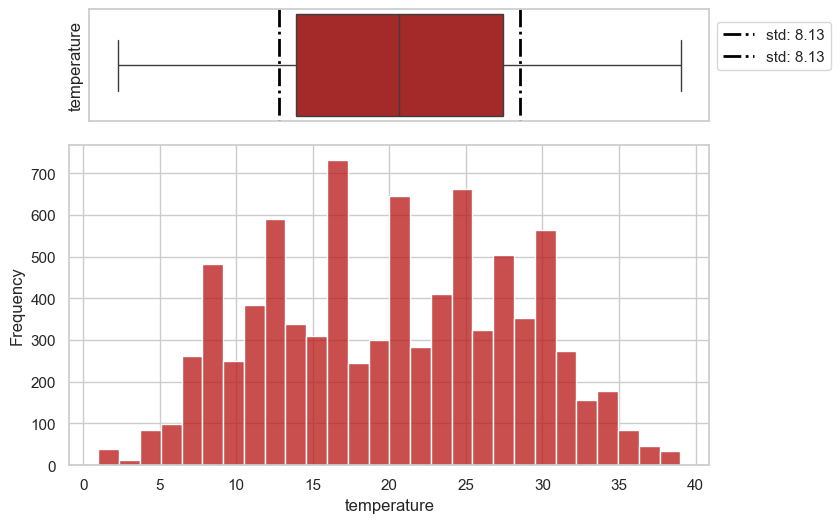

In [147]:
grafico_univariante(df2011,'temperature')

kurtosis: -0.88
simetria: -0.08
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


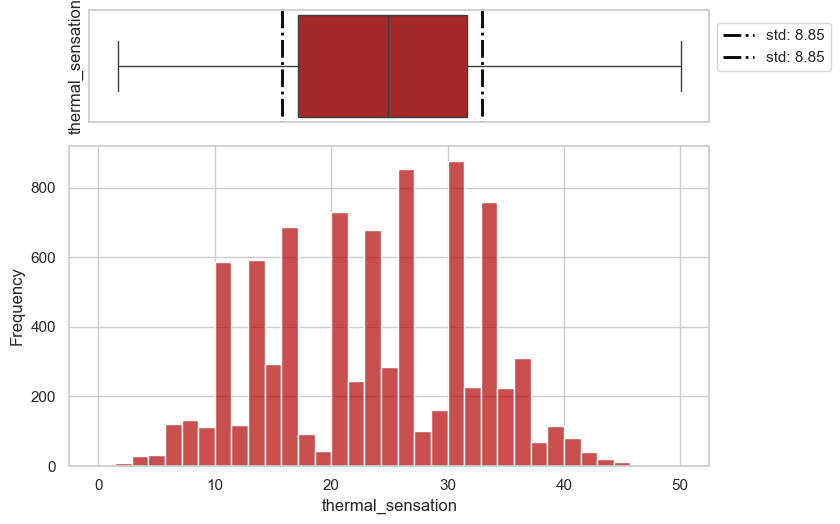

In [148]:
grafico_univariante(df2011,'thermal_sensation')

kurtosis: 0.57
simetria: 0.55
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


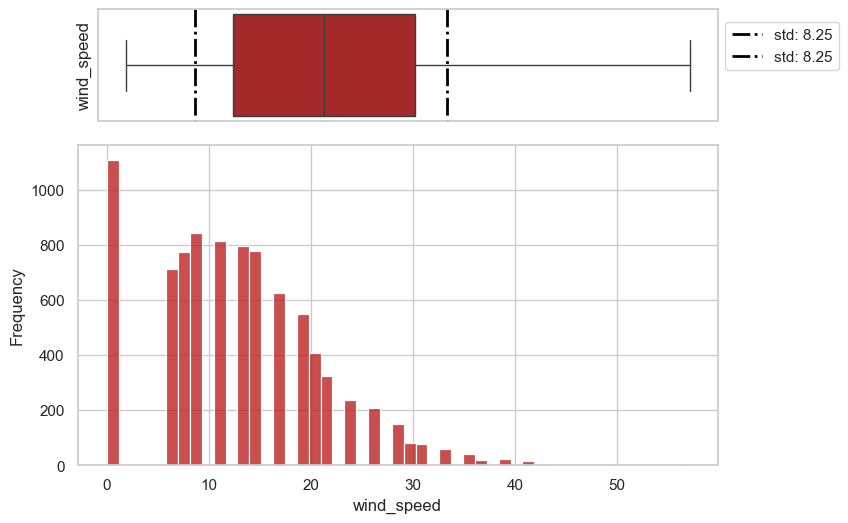

In [149]:
grafico_univariante(df2011,'wind_speed')

kurtosis: 6.51
simetria: 2.38
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica positiva (sesgo hacia la derecha).


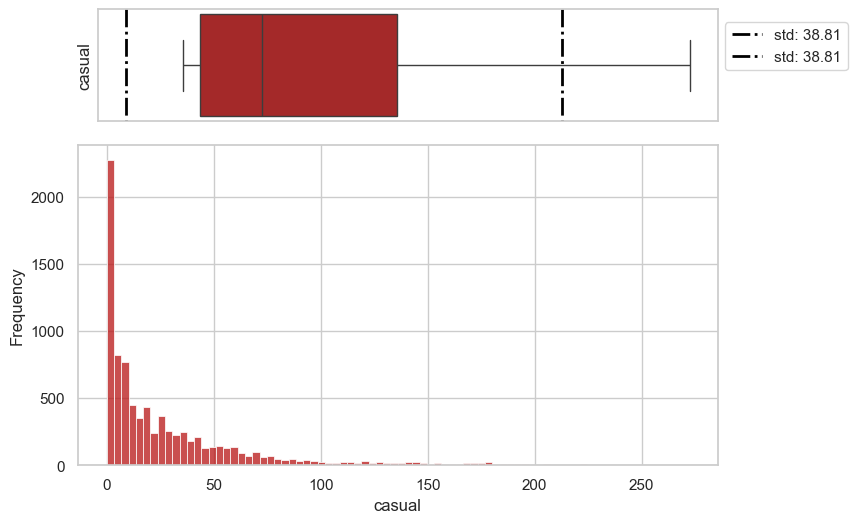

In [150]:
grafico_univariante(df2011,'casual')

kurtosis: 1.93
simetria: 1.39
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


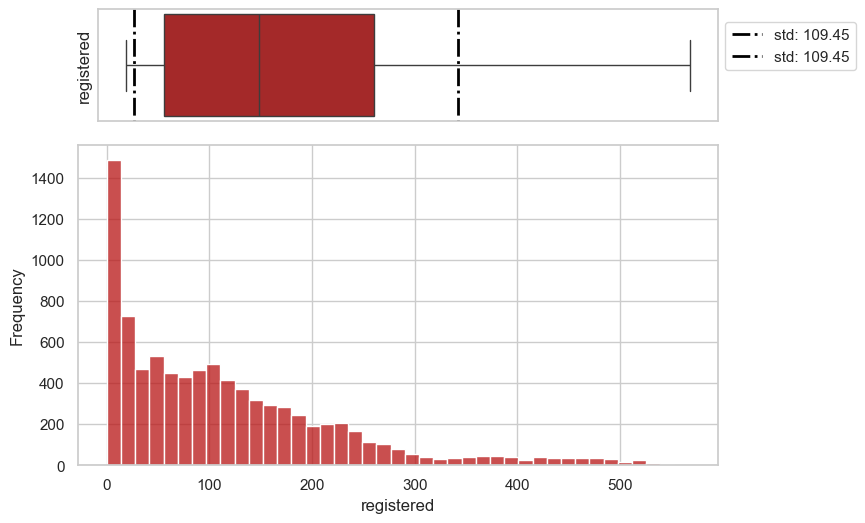

In [151]:
grafico_univariante(df2011,'registered')

kurtosis: 0.76
simetria: 1.13
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


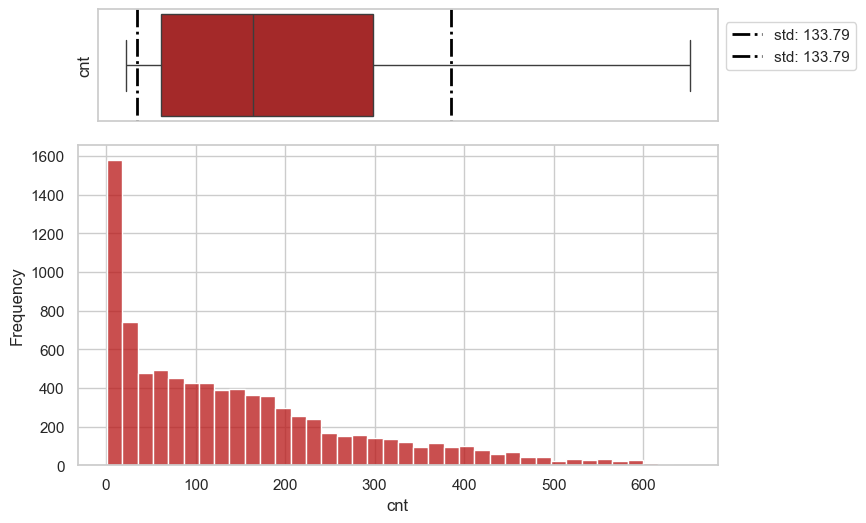

In [152]:
grafico_univariante(df2011,'cnt')

#### Análisis bivariante

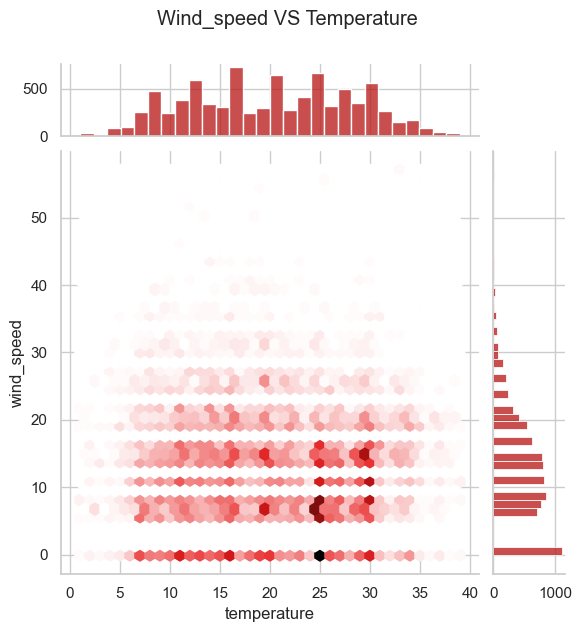

In [153]:
grafico_bivariante(df=df2011,x='temperature',y='wind_speed',forma='hex', title='Wind_speed VS Temperature');

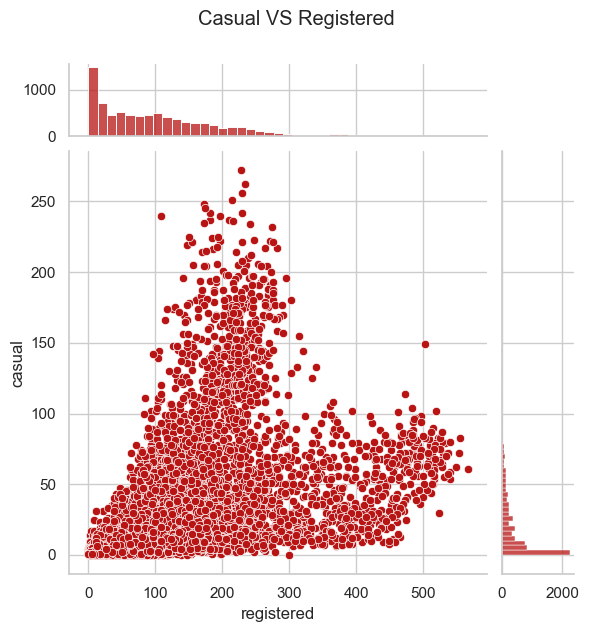

In [154]:
grafico_bivariante(df=df2011,x='registered',y='casual',forma='scatter',title='Casual VS Registered');

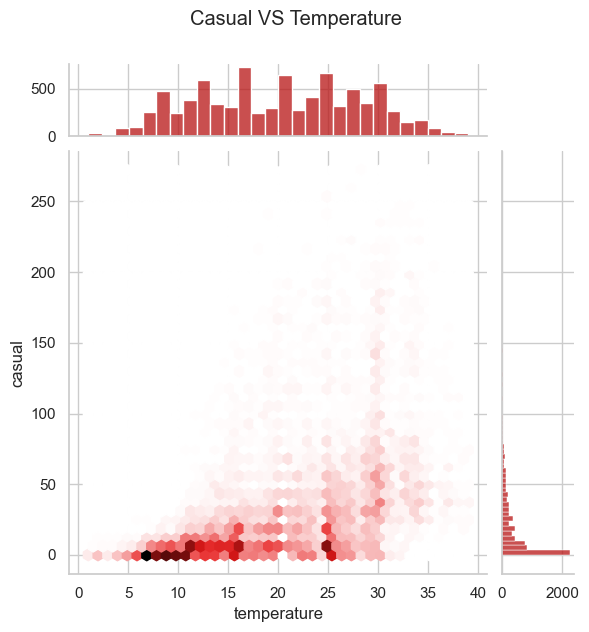

In [155]:
grafico_bivariante(df=df2011,x='temperature',y='casual',forma='hex', title='Casual VS Temperature');

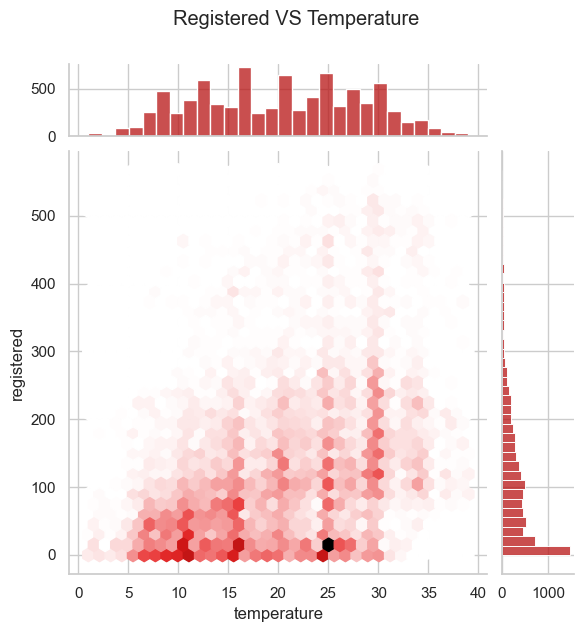

In [156]:
grafico_bivariante(df=df2011,x='temperature',y='registered',forma='hex', title='Registered VS Temperature');

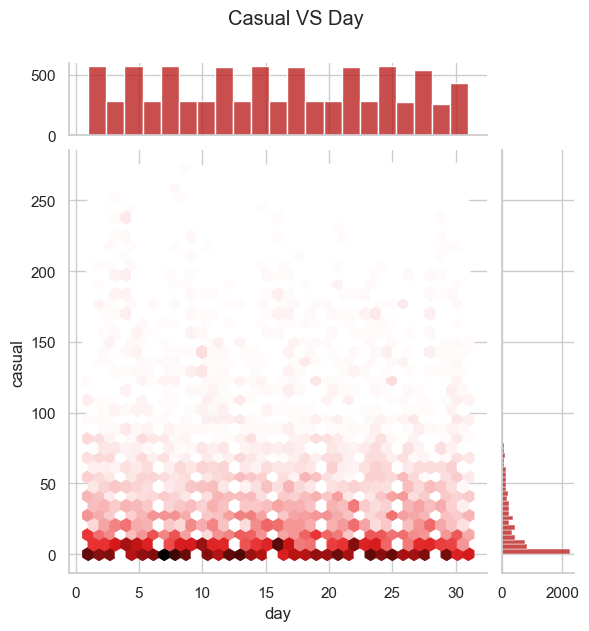

In [157]:
grafico_bivariante(df=df2011,x='day',y='casual',forma='hex', title='Casual VS Day');

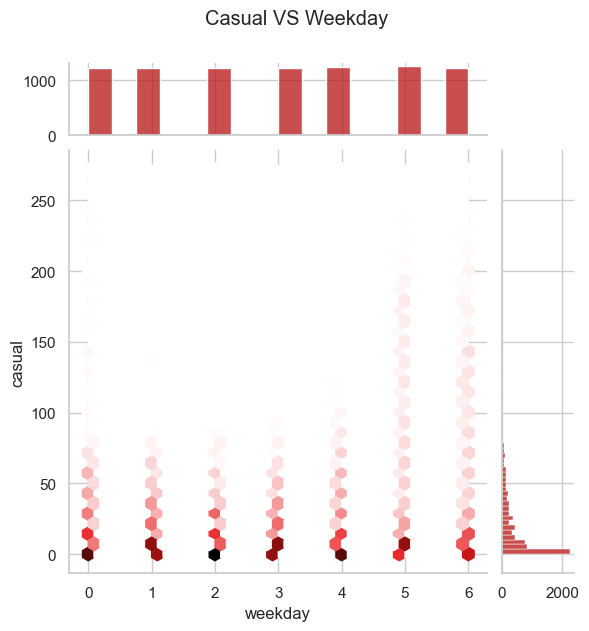

In [158]:
grafico_bivariante(df=df2011,x='weekday',y='casual',forma='hex', title='Casual VS Weekday');

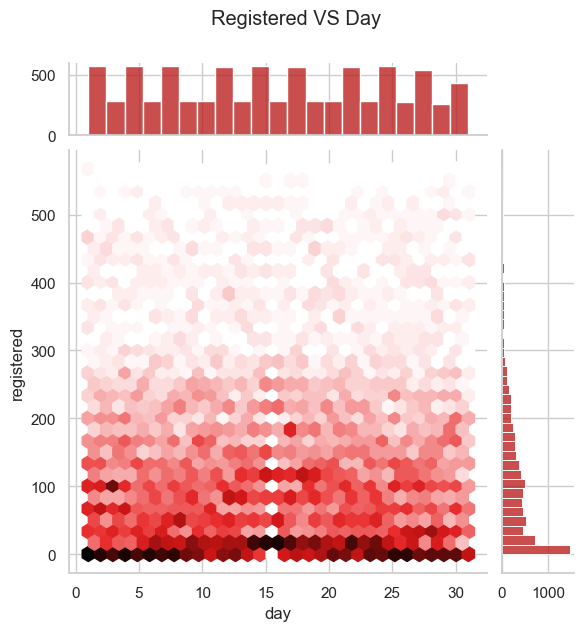

In [159]:
grafico_bivariante(df=df2011,x='day',y='registered',forma='hex', title='Registered VS Day');

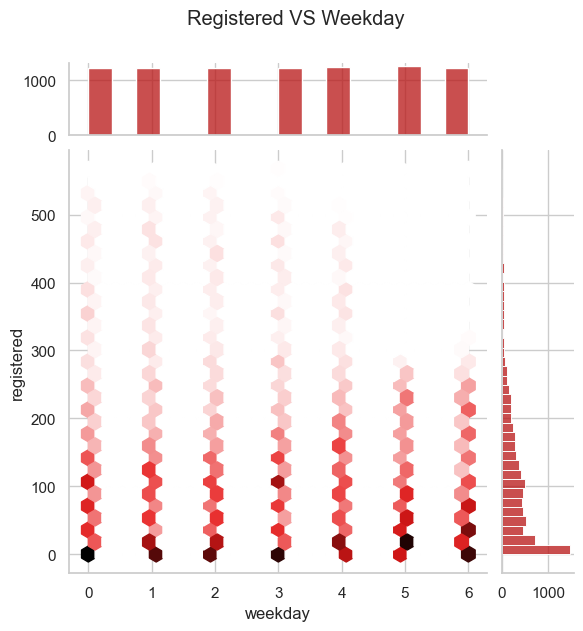

In [160]:
grafico_bivariante(df=df2011,x='weekday',y='registered',forma='hex', title='Registered VS Weekday');

#### Análisis multivariante

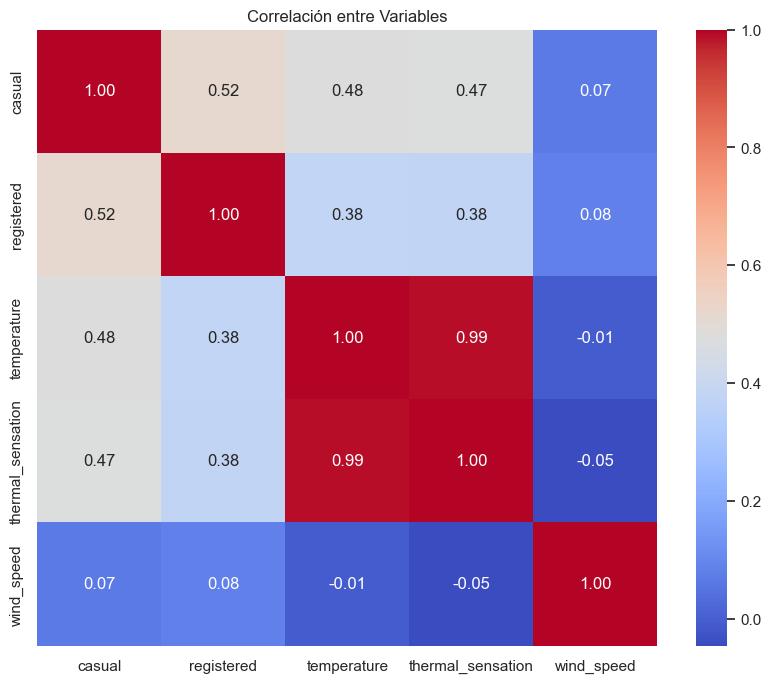

In [161]:
# Mapa de calor (correlación)
correlation_matrix = df2011[['casual','registered', 'temperature', 'thermal_sensation', 'wind_speed']].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables')
plt.show()

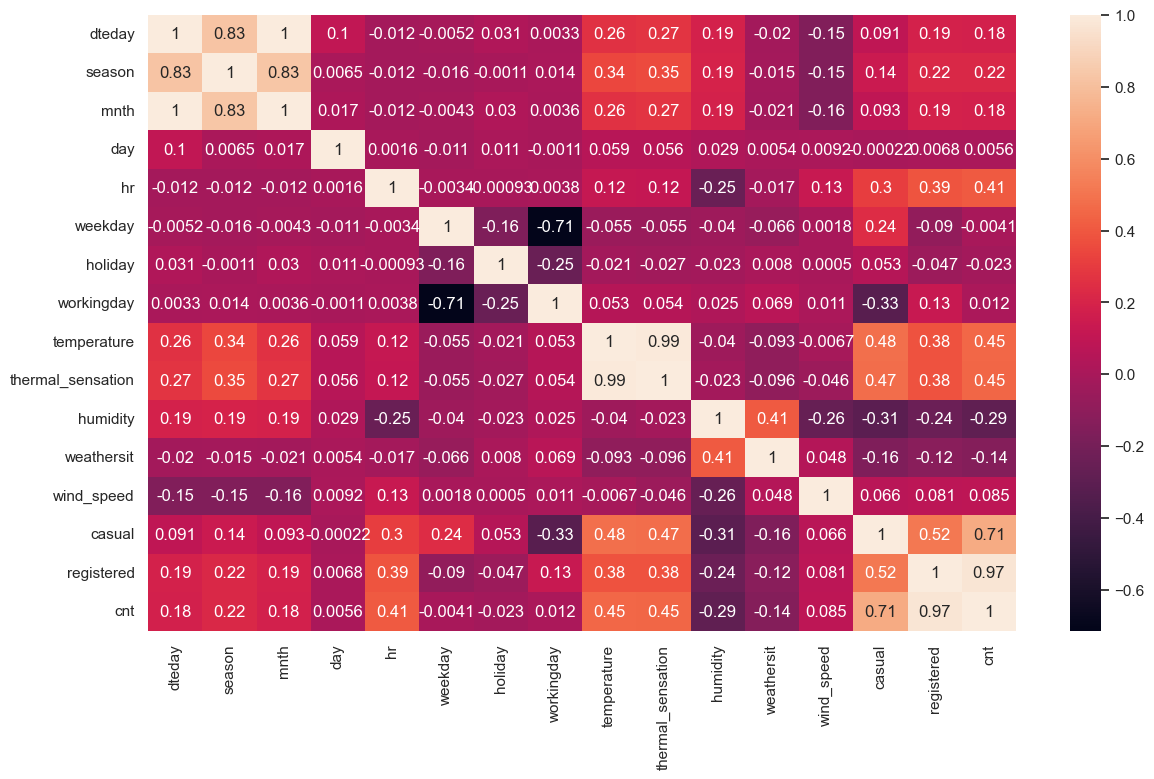

In [162]:
plt.figure(figsize=(14,8))
sns.heatmap(df2011.select_dtypes(exclude=['object']).corr(), annot=True);

*****

## -------------------------------------------- Hipótesis ------------------------------------------------------

****

#### **1**: Existe una diferencia significativa en el uso promedio de bicicletas entre estaciones cálidas (primavera y verano) y estaciones frías (invierno y otoño).


In [163]:
df2011['seasonteam'] = df2011['season'].replace({1:'frio',2:'calido',3:'calido',4:'frio'})
df2011

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt,seasonteam
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16,frio
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40,frio
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32,frio
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13,frio
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1,frio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92,frio
8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71,frio
8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52,frio


In [164]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['seasonteam'] == 'frio'],
                                    df2011['cnt'][df2011['seasonteam'] == 'calido'])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre estaciones frías y cálidas.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones frías y cálidas.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")


Prueba de Mann-Whitney para dos muestras independientes: stat = 7054605.0, p_value = 4.7389111611635094e-86
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas


In [165]:
dfH1 = df2011.groupby('season')[['cnt']].mean().reset_index()
dfH1

,season,cnt
0,1,72.533849
1,2,157.655924
2,3,187.343750
3,4,152.828960


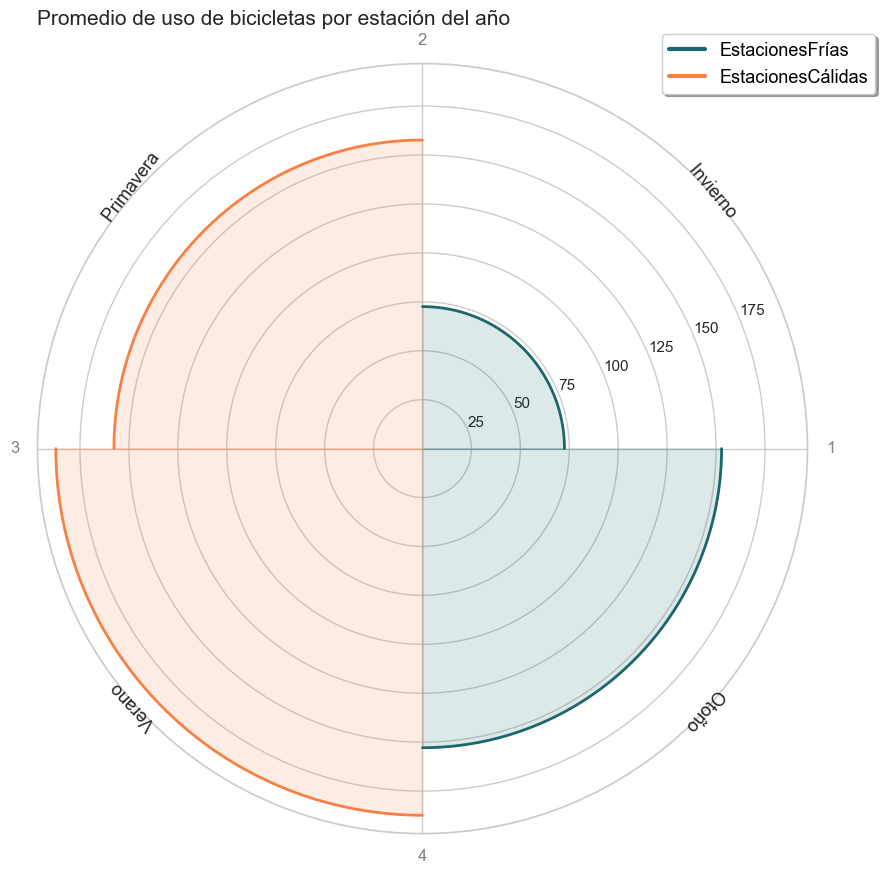

In [166]:
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

season = [1,2,3,4]

valores = [cant for cant in dfH1["cnt"]]
N = len(season)

angulos = [n / float(N) * 2 * np.pi for n in range(N)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),
                       subplot_kw=dict(polar=True))

plt.xticks(angulos, season, color='grey', size=12)

legend_lines = [] 
season2 = ['Invierno','Primavera','Verano','Otoño']
colores = ['#1b676b', '#f78145', '#f78145','#1b676b']
x = ['left','right', 'right', 'left']
r = [-50, 53, 133, 230]

# Agregar el primer ángulo al final para cerrar el círculo
angulos += [angulos[0]]

for i in range(N):
    start_angle = angulos[i]
    end_angle = angulos[i + 1]

    # Asegurar que el ángulo final no sea menor que el ángulo inicial para la última estación
    if end_angle < start_angle:
        end_angle += 2 * np.pi

    # Interpolación para suavizar las líneas
    interp_points = 100  # Número de puntos para la interpolación
    interp_angles = np.linspace(start_angle, end_angle, interp_points)
    interp_values = np.linspace(valores[i], valores[i], interp_points)

    # Rellenar el área bajo la curva
    ax.fill_between(interp_angles, 0, interp_values, color=colores[i], alpha=0.15)

    # Graficar la línea suavizada
    line, = plt.plot(interp_angles, interp_values, linewidth=2, linestyle='solid', color=colores[i], solid_capstyle='round')

    legend_lines.append(Line2D([0], [0], color=colores[i], linewidth=3, linestyle='solid'))
    
    # Etiquetas en las diagonales
    angle_mid = (start_angle + end_angle) / 2
    ax.text(angle_mid, max(valores), f" {season2[i]}", ha=x[i], va='center', rotation=r[i], fontsize='13')

# legend y title
plt.legend(legend_lines, [f'Estaciones{s}' for s in ['Frías','Cálidas']], loc='best', bbox_to_anchor=(1.10, 1.05), fontsize='13', shadow=True, labelcolor='black')

plt.title('Promedio de uso de bicicletas por estación del año', fontsize='15', fontweight='15', loc='left');


In [167]:
import plotly.express as px
import pandas as p

h1 = df2011.groupby('seasonteam')[['cnt']].sum().reset_index()
total_uso = df2011['cnt'].sum()
h1['porcentaje'] =  h1['cnt'] * 100 / total_uso

colors = {'calido': '#f78145', 'frio' : '#1b676b'}

# Crear el pie chart
fig = px.pie(h1, values='porcentaje', names=['Estaciones cálidas', 'Estaciones frías'],color='seasonteam',
                color_discrete_map=colors)

fig.update_layout(
    title_text='Promedio de uso de bicicletas',
    title_font=dict(size=30, color='black'),  # Ajustar el tamaño y color del título
    font=dict(family='Arial', size=30, color='black'),  # Ajustar el estilo de la letra
    width=800,  # Ajustar el ancho del gráfico
    height=600,  # Ajustar la altura del gráfico
    margin=dict(l=50, r=50, b=50, t=100),  # Ajustar los márgenes
)

fig.update_traces(textfont_color='white')

# Mostrar el gráfico
fig.show()

### *Highlights sobre el promedio de uso de bicicletas entre las estaciones cálidas y frías:*

*Las **estaciones cálidas** presentan un mayor uso del sistema a nivel promedio que las **estaciones frías**. También podemos observar que la diferencia entra las estaciones intermedias (primavera y otoño) presentan un comportamiento similar.*

#### **2**: Existe una diferencia en el promedio de uso entre las estaciones cálidas.

In [3]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 2],
                                    df2011['cnt'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")


Prueba de Mann-Whitney para dos muestras independientes: stat = 2176360.5, p_value = 9.950643607180731e-12
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano


In [4]:
dfH2 = df2011.query('season == 2 or season == 3').groupby(['season','mnth'])['cnt'].mean().reset_index()
dfH2

,season,mnth,cnt
0,2,3,87.842308
1,2,4,131.947149
2,2,5,182.555108
3,2,6,195.387500
4,3,6,207.191667
5,3,7,189.974462
6,3,8,186.991792
7,3,9,175.032381


In [5]:
# Calcula el porcentaje de uso para cada estación
suma_por_season = df2011.query('season == 2 or season == 3').groupby(['season'])['cnt'].sum()
total_uso = df2011.query('season == 2 or season == 3')['cnt'].sum()
porcentaje_por_season = (suma_por_season * 100 ) / total_uso


# Imprime los resultados
print("\nPorcentaje de uso por estación:")
print(round(porcentaje_por_season,2))
print("\nDiferencia porcentual:")
print(round(( (porcentaje_por_season[3] - porcentaje_por_season[2]) / porcentaje_por_season[2] ) * 100, 2))


Porcentaje de uso por estación:
season
2    45.28
3    54.72
Name: cnt, dtype: float64

Diferencia porcentual:
20.83


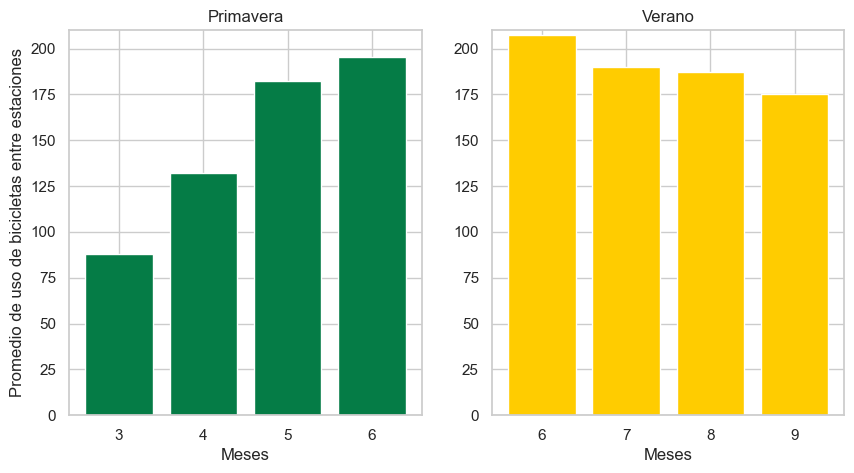

In [171]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
x = dfH2.query('season == 2')['mnth']
y = dfH2.query('season == 2')['cnt']
axs[0].bar(x,y,color='#057c46')
axs[0].set_title('Primavera')

axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones');

x1 = dfH2.query('season == 3')['mnth']
y1 = dfH2.query('season == 3')['cnt']
axs[1].bar(x1,y1,color='#FFCC00')

axs[1].set_title('Verano');
axs[1].set_xlabel('Meses');

y_min = 0  # establecer el límite mínimo deseado
y_max = 210  # establecer el límite máximo deseado
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max);

### *Highlights sobre el promedio de uso de bicicletas entre las estaciones cálidas:*

*Dentro de las **estaciones cálidas** presentan un mayor uso del sistema a nivel promedio la **temporada de verano** con una diferencia porcentual del 20,83%.*

#### **3**: Existe una diferencia en el promedio de uso entre las estaciones frías.

In [172]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 1],
                                    df2011['cnt'][df2011['season'] == 4])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones invierno y otoño.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1411373.5, p_value = 5.733279517481594e-91
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones invierno y otoño


In [7]:
dfH3_1 = df2011.query('season == 1').groupby('mnth')['cnt'].mean().reset_index()
dfH3_2 = df2011.query('season == 4').groupby('mnth')['cnt'].mean().reset_index()

def desplazar_elementos(lista):
    # Guardar el último elemento en una variable temporal
    temp = lista[-1]
    # Desplazar los elementos hacia la derecha
    for i in range(len(lista)-1, 0, -1):
        lista[i] = lista[i-1]
        
    # Colocar el último elemento en la primera posición
    lista[0] = temp
    return lista

# Llamar a la función para desplazar los elementos
dfH3_1['mnth'] = desplazar_elementos(pd.Categorical(dfH3_1['mnth'], ordered=True))
dfH3_1['cnt'] = desplazar_elementos(list(dfH3_1['cnt']))

print(dfH3_1)
print(dfH3_2)

  mnth        cnt
0   12  85.785441
1    1  55.507267
2    2  74.291217
3    3  87.672340
   mnth         cnt
0     9  185.031250
1    10  166.232840
2    11  142.095967
3    12  135.277083


In [8]:
# Calcula el porcentaje de uso para cada estación
suma_por_season = df2011.query('season == 1 or season == 4').groupby(['season'])['cnt'].sum()
total_uso = df2011.query('season == 1 or season == 4')['cnt'].sum()
porcentaje_por_season = (suma_por_season * 100 ) / total_uso

# Imprime los resultados
print("\nPorcentaje de uso por estación:")
print(round(porcentaje_por_season,2))
print("\nDiferencia porcentual:")
print(round(( (porcentaje_por_season[1] - porcentaje_por_season[4]) / porcentaje_por_season[4]) * 100, 2))


Porcentaje de uso por estación:
season
1    31.5
4    68.5
Name: cnt, dtype: float64

Diferencia porcentual:
-54.01


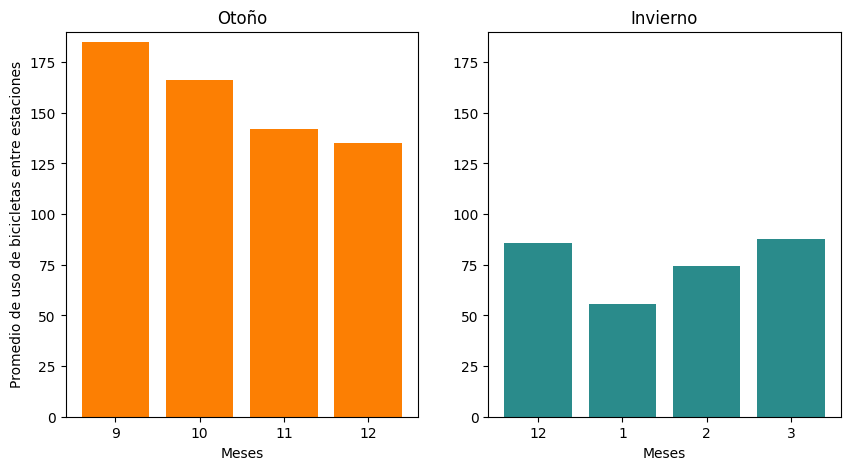

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

x = dfH3_1['mnth']
y = dfH3_1['cnt']

axs[1].bar(range(len(x)), y, color='#2a8b8b')
axs[1].set_title('Invierno')
axs[1].set_xlabel('Meses')
axs[1].set_xticks(range(len(x)))
axs[1].set_xticklabels(x)


x1 = dfH3_2['mnth']
y1 = dfH3_2['cnt']
axs[0].bar(x1, y1, color='#fc7f03')
axs[0].set_title('Otoño');
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones')
axs[0].set_xlabel('Meses');

y_min = 0  # establecer el límite mínimo deseado
y_max = 190  # establecer el límite máximo deseado
axs[1].set_ylim(y_min, y_max)
axs[0].set_ylim(y_min, y_max);

### *Highlights sobre el promedio de uso de bicicletas entre las estaciones frías:*

*Dentro de las **estaciones frías** presentan un menor uso del sistema a nivel promedio la **temporada de invierno** con una diferencia porcentual del -54,01 % menos respecto del otoño.*

#### **4**: ¿Cómo se manifiesta el comportamiento por tipo de clientes durante la temporada de mayor actividad?

In [176]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 3],
                                    df2011['registered'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1106975.0, p_value = 4.187546506314857e-230
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.


In [177]:
dfH4 = df2011.query('season == 3').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH4

,mnth,casual,registered
0,6,42.970833,164.220833
1,7,48.994624,140.979839
2,8,39.231190,147.536252
3,9,37.796190,137.236190


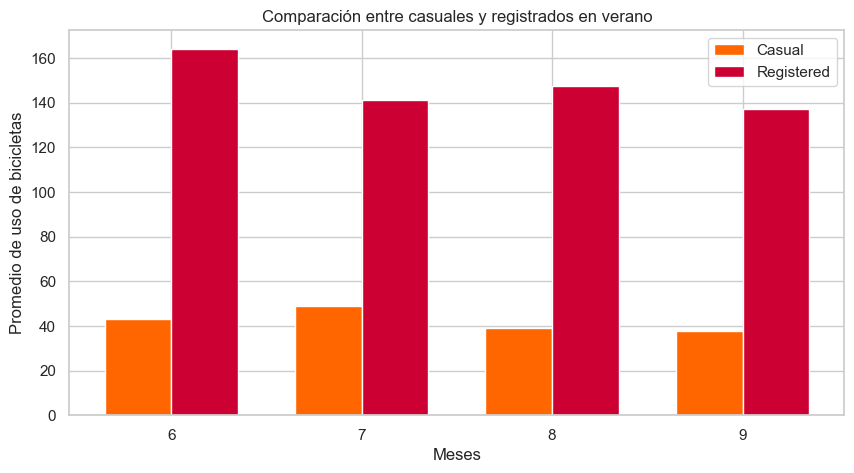

In [178]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH4['casual']
columna2_data = dfH4['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH4))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#FF6600')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados en verano')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH4['mnth'])
plt.legend()

# Muestra el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante el verano:*

*Dentro de la **temporada de verano** presentan un mayor uso del sistema a nivel promedio **los clientes registrados** llegando al máximo durante el mes de junio. Por otro lado, **los clientes casuales** presentan su máximo de uso durante el mes julio*

#### **5**:¿Cómo se refleja el comportamiento por tipo de clientes durante la temporada de menor actividad?

In [179]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 1],
                                    df2011['registered'][df2011['season'] == 1])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de invierno.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 636154.0, p_value = 0.0
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de invierno.


In [180]:
dfH5 = df2011.query('season == 1').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH5

,mnth,casual,registered
0,1,4.466570,51.040698
1,2,9.617874,64.673344
2,3,19.057447,68.614894
3,12,12.080460,73.704981


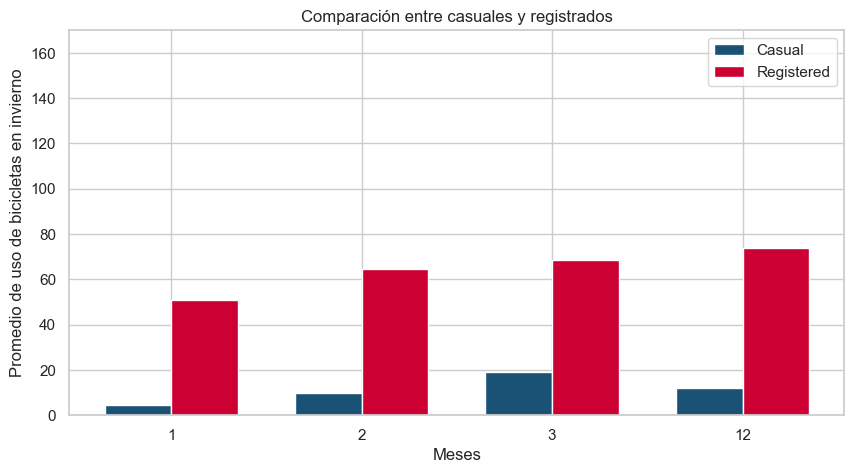

In [181]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH5['casual']
columna2_data = dfH5['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH5))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#1A5276')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH5['mnth'])
plt.ylim(0,170)

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas en invierno')
plt.title('Comparación entre casuales y registrados')
plt.legend()

plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante el invierno:*

*Dentro de la **temporada de invierno** presentan un menor uso del sistema a nivel promedio **los clientes casuales** llegando al mínimo durante el mes de enero al igual que **los clientes registrados**.*

#### **6**: ¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de mayor actividad?

In [182]:
dfH6 = df2011.query('season == 3').groupby(['day']).agg({'casual': 'mean', 'registered': 'mean', 'temperature': 'mean', 'thermal_sensation' : 'mean'}).reset_index()
dfH6

,day,casual,registered,temperature,thermal_sensation
0,1,38.305556,166.458333,29.500000,32.805556
1,2,53.888889,150.152778,29.583333,32.986111
2,3,65.055556,111.430556,28.944444,33.041667
3,4,88.680556,127.416667,29.347222,33.305556
4,5,45.694444,133.222222,29.166667,33.083333
5,6,35.338028,128.507042,27.098592,31.422535
6,7,30.138889,113.930556,28.625000,32.472222
7,8,23.816901,119.957746,28.788732,32.211268
8,9,46.000000,141.250000,29.444444,32.763889
9,10,60.791667,147.625000,29.722222,33.055556


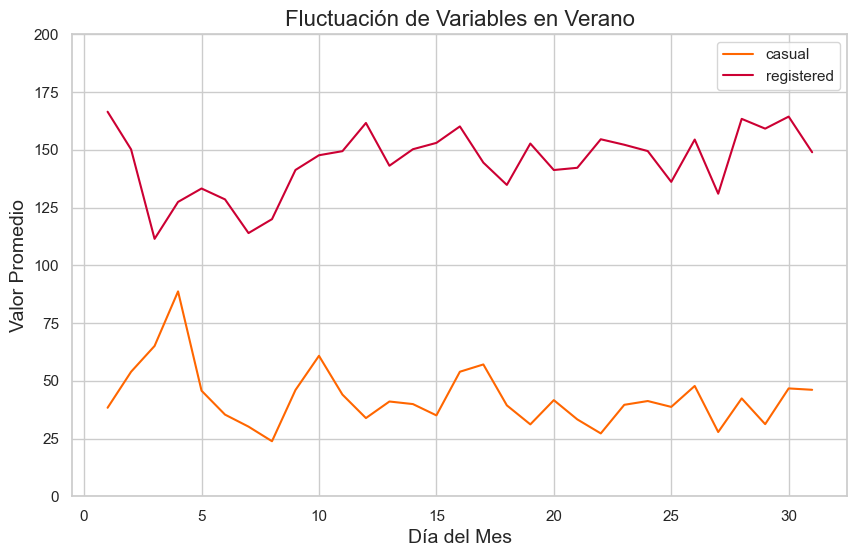

In [183]:
sns.set(style="whitegrid")

# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='casual', data=dfH6, label='casual', color='#FF6600')
sns.lineplot(x='day', y='registered', data=dfH6, label='registered', color='#CC0033')

# Configurar el título y las etiquetas de los ejes
plt.title('Fluctuación de Variables en Verano', fontsize=16)
plt.xlabel('Día del Mes', fontsize=14)
plt.ylabel('Valor Promedio', fontsize=14)

# Mostrar la leyenda
plt.legend()
plt.ylim(0, 200)

# Mostrar el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante los días del mes en verano:*

*Dentro de la **temporada de verano** presentan un mayor uso del sistema a nivel promedio durante el mes **los clientes registrados** .*

#### **7**: ¿Cómo varía el uso promedio de bicicletas mensualmente durante la temporada de menor actividad?

In [184]:
dfH7 = df2011.query('season == 1').groupby(['day']).agg({'casual': 'mean', 'registered': 'mean', 'temperature': 'mean', 'thermal_sensation': 'mean'}).reset_index()
dfH7

,day,casual,registered,temperature,thermal_sensation
0,1,7.253521,51.845070,11.042254,14.352113
1,2,6.112676,56.718310,13.070423,15.464789
2,3,4.405797,62.028986,7.956522,9.492754
3,4,5.857143,68.628571,9.271429,11.642857
4,5,11.577465,54.366197,11.521127,14.140845
5,6,7.942857,46.828571,11.842857,14.742857
6,7,7.314286,65.457143,9.871429,12.600000
7,8,6.222222,57.972222,9.305556,11.013889
8,9,4.197183,56.619718,7.802817,9.183099
9,10,1.942029,48.521739,9.260870,11.260870


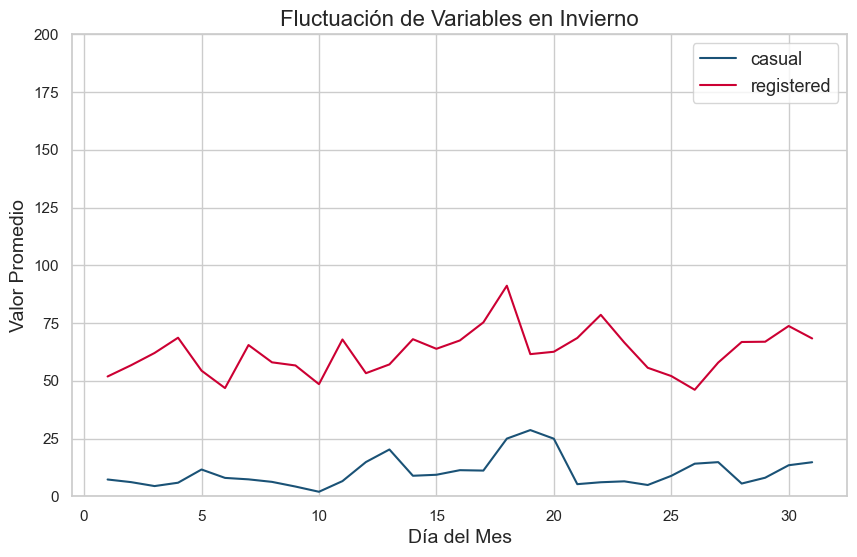

In [185]:
sns.set(style="whitegrid")
# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='casual', data=dfH7, label='casual', color='#1A5276')
sns.lineplot(x='day', y='registered', data=dfH7, label='registered', color='#CC0033')

# Configurar el título y las etiquetas de los ejes
plt.title('Fluctuación de Variables en Invierno', fontsize=16)
plt.xlabel('Día del Mes', fontsize=14)
plt.ylabel('Valor Promedio', fontsize=14)

# Mostrar la leyenda
plt.legend(fontsize='13')
plt.ylim(0, 200)

# Mostrar el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante los días del mes en invierno:*

*Dentro de la **temporada de invierno** presentan un menor uso del sistema a nivel promedio **los clientes casuales**. Podemos observar gracias al gráfico y la tabla que la temperatura durante esas subidas de los clientes casuales se incrementa. Por otro lado, los picos de los clientes registrados parecen decaer por corto plazo y luego aumentar, se podría tratar de insinuar un uso semanal por parte de estos y esas caídas vendrían a ser fines de semana.*

#### **8**: ¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

In [186]:
dfH8 = df2011.query('season == 3').groupby(['weekday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH8.replace({0 : 'Lunes', 1 : 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6:'Domingo'}, inplace=True)
dfH8

,weekday,casual,registered
0,Lunes,40.450161,146.237942
1,Martes,30.940299,159.382090
2,Miércoles,27.976190,156.726190
3,Jueves,27.632836,152.310448
4,Viernes,35.673077,152.724359
5,Sábado,69.352941,121.594771
6,Domingo,69.940984,120.606557


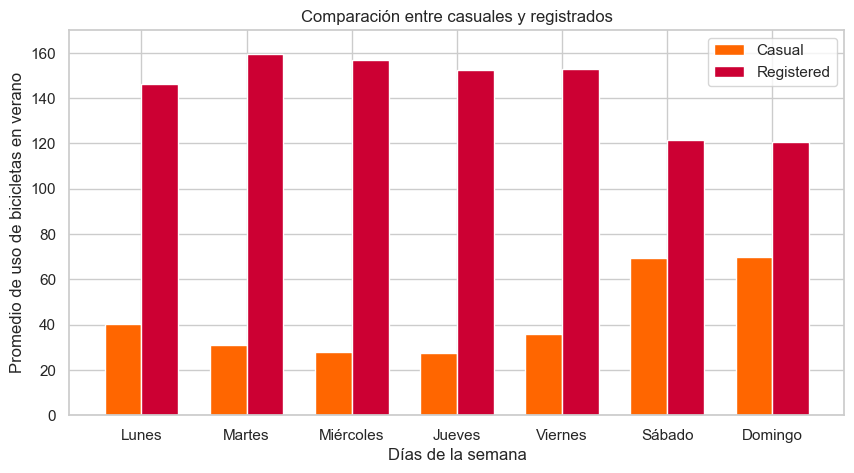

In [187]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH8['casual']
columna2_data = dfH8['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH8))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#FF6600')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Días de la semana')
plt.ylabel('Promedio de uso de bicicletas en verano')
plt.title('Comparación entre casuales y registrados')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH8['weekday'])

plt.legend()
plt.ylim(0, 170)
# Muestra el gráfico
plt.show()

### *Highlights sobre el comportamiento de clientes en promedio durante los días de la semana en verano:*

*Dentro de la **temporada de verano** presentan un comportamiento mayor a nivel promedio **los clientes casuales** durante los fines de semana, mientras que **los clientes registrados** los días hábiles de la semana.*

#### **9**: ¿Cómo se comporta el uso promedio de bicicletas por tipo de clientes durante los días de la semana de nuestra temporada de mayor frecuencia?

In [188]:
dfH9 = df2011.query('season == 1').groupby(['weekday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH9.replace({0 : 'Lunes', 1 : 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6:'Domingo'}, inplace=True)
dfH9

,weekday,casual,registered
0,Lunes,7.296429,56.989286
1,Martes,5.764259,65.908745
2,Miércoles,6.122034,72.725424
3,Jueves,6.086207,74.200000
4,Viernes,10.726073,74.590759
5,Sábado,17.332335,49.056886
6,Domingo,17.346535,43.980198


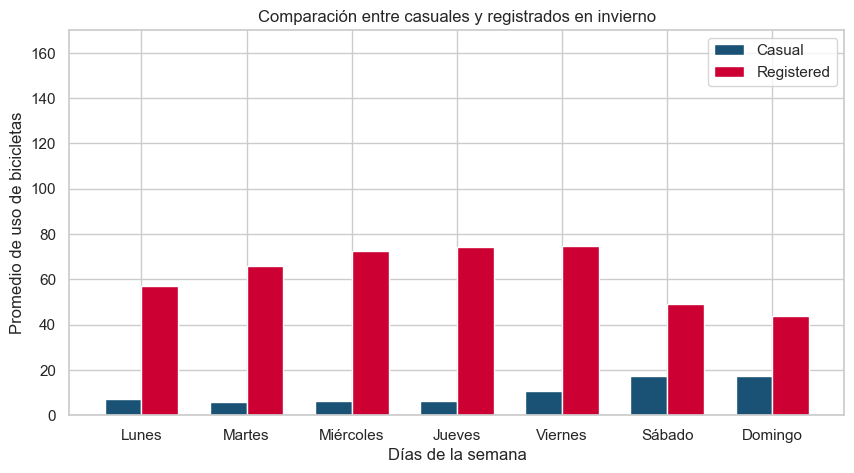

In [189]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH9['casual']
columna2_data = dfH9['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH9))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#1A5276')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#CC0033')

# Configura las etiquetas y la leyenda
plt.xlabel('Días de la semana')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados en invierno')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH9['weekday'])
plt.legend()

plt.ylim(0, 170)
# Muestra el gráfico
plt.show()


### *Highlights sobre el comportamiento de clientes en promedio durante los días de la semana en invierno:*

*Dentro de la **temporada de invierno** presentan un comportamiento mayor a nivel promedio **los clientes casuales** durante los fines de semana, mientras que **los clientes registrados** los días hábiles de la semana.*

*****

*****

******


### ----------------------------------------------------- *Highlights a nivel global*--------------------------------------------------------


******

###  1. Las estaciones cálidas serán nuestras temporadas de mayor movimiento, extendiendosé un poco más al otoño. Se aplicarían para estos, trabajos temporales durante dichas estaciones.
###  2. Para nivelar nuestras estaciones cálidas y lograr compensar las grandes caídas durante las temporadas frías, propondría algunas promociones durante la estación de primavera para nuestros clientes registrados.
###  3. Tendremos grandes potenciales de clientes casuales durante los días festivos para atraerlos a nuestra empresa.
###  4. Se espera una caída importante durante el mes de enero, por parte de ambos clientes. 
###  5. Establece colaboraciones con empresas locales, como cafeterías, restaurantes o tiendas, para ofrecer descuentos cruzados durante nuestra temporada de menor actividad, con el fin de fomentar la sinergia entre negocios locales y aumentar la visibilidad del servicio.
###  6. Nuestros clientes registrados utilizan el sistema en mayor medida durante la semana, por lo que yo pondría las promociones durante el lunes que es cuando se arranca o un miércoles para contrarestar esa flojera del inicio semanal.
###  7. Nuestros clientes casuales por otro lado presentan un aumento durante los fines de semana, por lo que pondría algún cupo familiar o de amigos y lograr contrarestar esa caída semanal.
###  8. Programas de Lealtad: Implementa un programa de lealtad para clientes registrados que ofrezca recompensas, descuentos exclusivos o beneficios acumulativos. Esto podría incentivar el uso continuo de bicicletas a lo largo del año, incluso durante las temporadas más bajas.
###  9. Organizar eventos especiales o colabora con eventos locales, como festivales, carreras, o actividades culturales. Esto podría atraer tanto a clientes casuales como a registrados, generando interés adicional y aumentando la demanda en momentos clave.


*****

### -----------------------------------------------------  *Investigaciones futuras:*  ------------------------------------------------------------------


****

1. Personalizar aún más a nivel horario el comportamiento por parte de nuestros clientes.
2. Utilizar información de clientes para agrupar en grupos más específicos como, sexo, duración, año de nacimiento.
3. Expandir nuestra investigación a nivel geográfico, con el fin de ajustar las estaciones de bicicletas con mayor precisión y como este análisis en base a la demanda.